# Project : Credit Card Fraud Detection With Machine Learning.

# Question
Assume that you are employed to help a credit card company to detect potential fraud cases
so that the customers are ensured that they won’t be charged for the items they did not
purchase. You are given a dataset containing the transactions between people, the
information that they are fraud or not, and you are asked to differentiate between them.
The dataset (named : creditcard.csv) contain 31 variables and the last one is in the range of 0
and 1 ; we have 284 807 observations.
You are asked to build a classification models using : SVM, Random forest and the Neural
network, to classify and distinguish fraud transactions.
Work in group of three (03).

In [2]:
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import StratifiedShuffleSplit    ## pour la division de notre data en train et test
from sklearn.preprocessing import LabelEncoder

### Importing the dataset

In [3]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()#compte les NaNs et les lignes sont accédées en fonction de ce nombre trié.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###### Here we do not have non null values

In [6]:
# Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DAD5F93C8>,
      dtype=object)

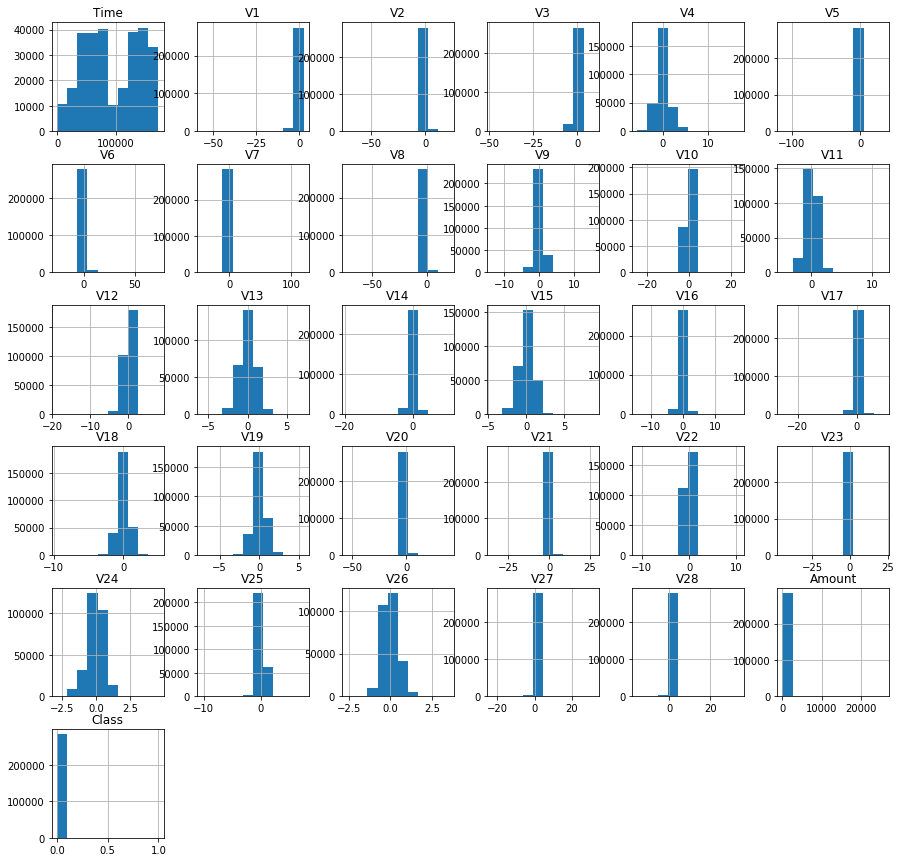

In [7]:
df.hist(figsize=(15,15))

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df['Class'].value_counts() # Le nombre de realisation de chaque class d'une variable categorielle.

0    284315
1       492
Name: Class, dtype: int64

From our dataset we have 492 fraud cases and 284315 non fraud cases.

Cet ensemble de données est déséquilibré, ce qui signifie que l'utilisation des données telles quelles pourrait entraîner un comportement indésirable de la part d'un classificateur supervisé. Pour faciliter la compréhension, si un classificateur devait s'entraîner avec cet ensemble de données en essayant d'obtenir la meilleure précision possible, il qualifierait très probablement chaque transaction de non frauduleuse.
Also if the imbalanced data is used on our models it will be baised and make wrong assumptions since the non fraud cases will have more than 90% concerntration.It will assume that most of the cases are non fraud.

In [10]:
print(np.mean(df.Amount),'is the mean of the amount in the dataframe')

88.34961925087359 is the mean of the amount in the dataframe


In [11]:
print('The percentage of the dataset that are fraudulent transactions are: ',len(df[df.Class==1])/len(df.Class)*100,'%' )

The percentage of the dataset that are fraudulent transactions are:  0.1727485630620034 %


In [12]:
print('The percentage of the dataset that are fraudulent transactions are: ',len(df[df.Class==0])/len(df.Class)*100,'%' )

The percentage of the dataset that are fraudulent transactions are:  99.82725143693798 %


Text(0.5,1,'Bar graph of non-fraud and fraudulent activities')

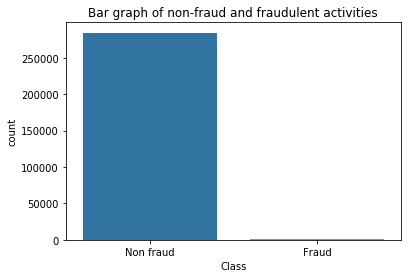

In [13]:
Labels = ["Non fraud", "Fraud"]
sns.countplot(df['Class'])
plt.xticks(range(2), Labels)
plt.title('Bar graph of non-fraud and fraudulent activities')

##### The plot above gives a pictorial view of how much fraud cases and non-fraudulent(Normal) cases we have

In [14]:
df_fraud = df[df['Class'] == 1]
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + 
      ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

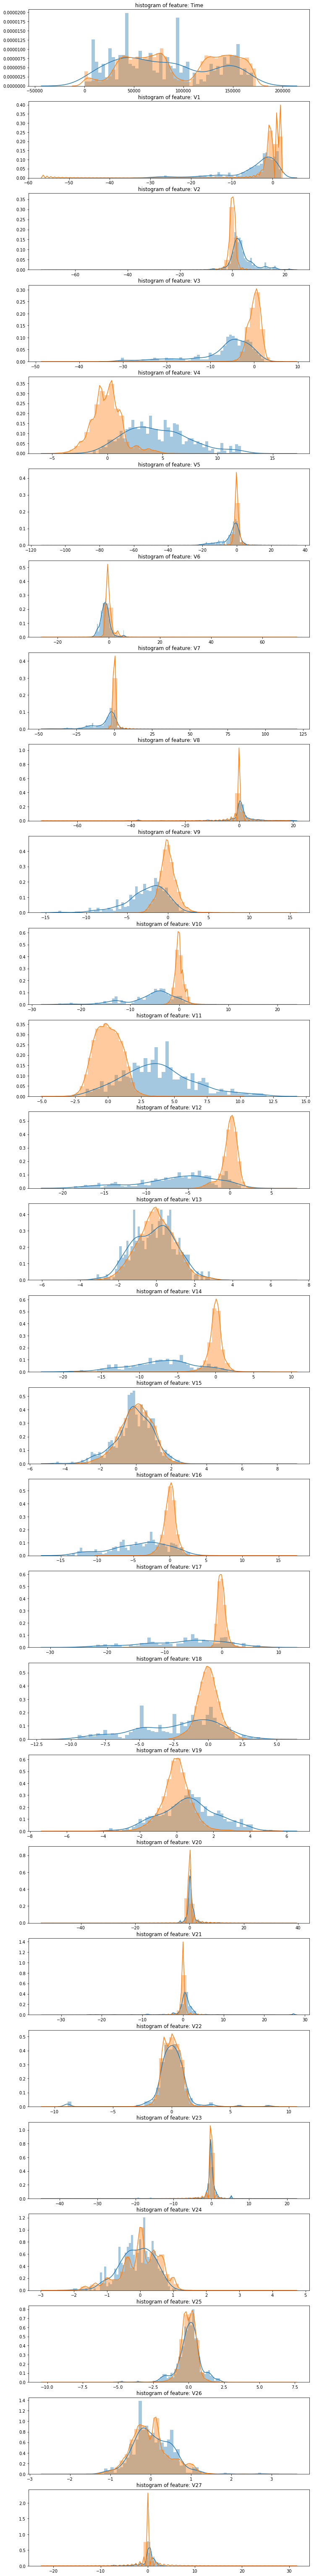

In [15]:
from matplotlib import gridspec
# distribution of anomalous features
features = df.iloc[:,0:28].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[c][df.Class == 1], bins=50)
    sns.distplot(df[c][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Time')

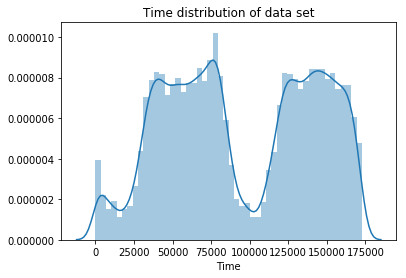

In [18]:
Time = df['Time'].values
sns.distplot(Time)
plt.title('Time distribution of data set')
plt.xlabel('Time')

A graphical view of how $time$ is distributed across all the given values

Text(0.5,1,'A heatmap showing the correlation between the features')

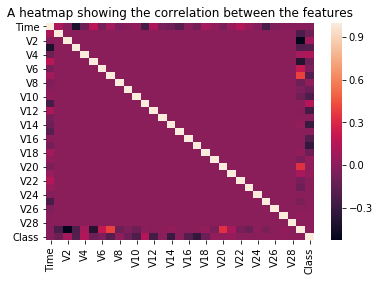

In [14]:
import seaborn as sns
cmm=df.corr()
sns.heatmap(cmm)
plt.title('A heatmap showing the correlation between the features')

Dans la HeatMap, nous pouvons clairement voir que la plupart des fonctionnalités ne sont pas corrélées à d'autres fonctionnalités, mais certaines fonctionnalités ont une corrélation positive ou négative les unes avec les autres. Par exemple, «V2» et «V5» sont fortement corrélés négativement avec la fonction appelée «Montant». Nous voyons également une certaine corrélation avec «V20» et «Montant». Cela nous permet de mieux comprendre les données dont nous disposons.

In [15]:
# if df.duplicated().any():
#     print(df.loc,end='\n\n')

##### Since our data is imbalanced we use techniques such as oversampling and undersampling to make the data even and we also test it on the models to get the best one

# oversampling

Une façon de procéder au sur-échantillonnage est de reproduire les tuples des classes sous-représentées jusqu'à ce que nous atteignions une proportion correcte entre les classes

Cependant, comme nous n'avons ni le temps ni la patience nécessaires, nous allons utiliser le classificateur avec les données de formation sous-échantillonnées (pour ceux qui utilisent le principe de sous-échantillonnage, si les résultats sont vraiment mauvais, il suffit de relancer la définition de l'ensemble de données de formation).

In [16]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
X = df.drop(['Class'], axis = 1) 
Y = df["Class"] 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
sm = RandomOverSampler(sampling_strategy=0.7)
X_train_over,Y_train_over = sm.fit_resample(X_train,Y_train)
X_train_over.shape, Y_train_over.shape

((338313, 30), (338313,))

In [17]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#For random forest classifier
RF=RandomForestClassifier(random_state=0,max_depth=20)
RF1=RF.fit(X_train_over,Y_train_over)
print ('The score for RandomForest on the test data is: ',RF.score(X_test,Y_test))

   

The score for RandomForest on the test data is:  0.9996488887328394


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



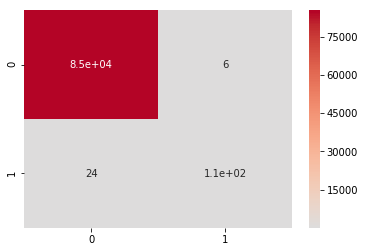

In [18]:
#prediction for oversampling in randaom forest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
Y_pred=RF.predict(X_test)
print(classification_report(Y_test,Y_pred))
CM=confusion_matrix(Y_test,Y_pred)
sns.heatmap(CM,annot=True,center=0,cmap='coolwarm')

In [19]:
#for SVM
Support_Vector=svm.SVC()
SS=Support_Vector.fit(X_train_over,Y_train_over)
print ('The score for SVM on the test data is: ',Support_Vector.score(X_test,Y_test))


In [20]:
#prediction for oversampling in svm
Y_predict=Support_Vector.predict(X_test)
print(classification_report(Y_test,Y_predict))
cfm=confusion_matrix(Y_test,Y_predict)
sns.heatmap(cfm,annot=True,center=0,cmap='coolwarm')

With the two methods of oversampling it can be seen that the RandomForest yielded good results.

# UNDERSAMPLING 

Nous séparons nos données en deux groupes : un ensemble de données sur les trains et un ensemble de données de test.D'abord, nous construisons notre jeu de données sur les trains

In [21]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
Under= RandomUnderSampler(random_state=0,sampling_strategy=0.5)
x_under,y_sample=Under.fit_resample(X,Y)

In [22]:
from sklearn.model_selection import train_test_split
x_under=pd.DataFrame(x_under)
y_under=pd.DataFrame(y_sample)
under_sample_df=pd.concat([x_under,y_under],axis=1)
X_train, X_test, y_train, y_test=train_test_split(x_under,y_under,random_state=0,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1180, 30), (296, 30), (1180, 1), (296, 1))

After undersampling and splitting our data we implement it on the SVM,RandomForest and Neural network

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=10)
RF.fit(x_under,y_under)
test_x=df.drop(['Class'],axis=1)
test_y=df['Class']
RF.score(test_x,test_y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9907937656026713

In [45]:
y_pred=RF.predict(test_x)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.16      0.98      0.27       492

    accuracy                           0.99    284807
   macro avg       0.58      0.99      0.63    284807
weighted avg       1.00      0.99      0.99    284807



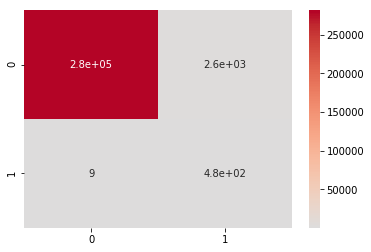

In [47]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(test_y, y_pred)
sns.heatmap(cm,annot=True,center=0,cmap='coolwarm')

After the undersampling and fitting we tested the data on the original data set and from our classification report and it gave a very tremendous score on the report showing that the RandonForest works very well for our dataset.Also from the Confusion matrix illustrated on the heatmap,the $TP$ and $TN$ had the highest predictions than those not predicted correctly

# Support Vector Machine

In [48]:
from sklearn.svm import  SVC
svm=SVC()
svm.fit(x_under,y_under)
svm.score(X_test,y_test)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6655405405405406

In [49]:
# Testing svm on original data set
svm.score(test_x,test_y)

0.9982725143693799

In [50]:
print('The classification report on the undersampled data set',classification_report(y_test,svm.predict(X_test)))
print('The clasification report on the original dataset',classification_report(test_y,svm.predict(test_x)))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report on the undersampled data set               precision    recall  f1-score   support

           0       0.67      1.00      0.80       197
           1       0.00      0.00      0.00        99

    accuracy                           0.67       296
   macro avg       0.33      0.50      0.40       296
weighted avg       0.44      0.67      0.53       296



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The clasification report on the original dataset               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


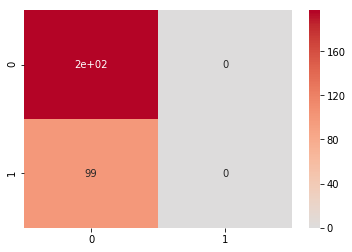

In [51]:
cm =confusion_matrix(y_test, svm.predict(X_test))
sns.heatmap(cm,annot=True,center=0,cmap='coolwarm')

##### The heatmap gives us the overview of the predicted values and the true values

In [53]:
x_under.shape,y_under.shape

((1476, 30), (1476, 1))

#  Neural Network

In [52]:
from tensorflow import keras
network = keras.Sequential([
    keras.layers.Dense(1180, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1180, activation='relu'),
    keras.layers.Dense(1180, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid'),
])

network.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1180)              36580     
_________________________________________________________________
batch_normalization (BatchNo (None, 1180)              4720      
_________________________________________________________________
dropout (Dropout)            (None, 1180)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1180)              1393580   
_________________________________________________________________
dense_2 (Dense)              (None, 1180)              1393580   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1180)              4720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1180)              0

Here we used tensorflow library, making use of the activation functions(sigmoid and relu),and since our predictions are a yes or no type we use the binary crossentropy as our loss function, and we also use the 'Adam' optimizer.
We also used attributes from the classification report thus the recall and precision to check the performance of our model

In [29]:
from sklearn.model_selection import GridSearchCV
metric=[keras.metrics.Recall(name='Recall'),
       keras.metrics.Precision(name='Precision'),
       keras.metrics.AUC(name='AUC')]
network.compile(optimizer='Adam',loss='binary_crossentropy',metrics=metric)
network.fit(X_train,y_train,epochs=40,batch_size=3000,workers=5)

Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: 0.8547 - Recall: 0.5598 - Precision: 0.3349 - AUC: 0.5162
Epoch 2/40
1/1 [==============================] - 0s 227ms/step - loss: 2.2648 - Recall: 0.5318 - Precision: 0.3732 - AUC: 0.5362
Epoch 3/40
1/1 [==============================] - 0s 260ms/step - loss: 0.7744 - Recall: 0.4402 - Precision: 0.3977 - AUC: 0.5383
Epoch 4/40
1/1 [==============================] - 0s 244ms/step - loss: 0.9785 - Recall: 0.4962 - Precision: 0.3042 - AUC: 0.4716
Epoch 5/40
1/1 [==============================] - 0s 235ms/step - loss: 0.9856 - Recall: 0.7099 - Precision: 0.3806 - AUC: 0.5533
Epoch 6/40
1/1 [==============================] - 0s 231ms/step - loss: 0.7370 - Recall: 0.5522 - Precision: 0.3709 - AUC: 0.5490
Epoch 7/40
1/1 [==============================] - 0s 244ms/step - loss: 0.7190 - Recall: 0.3206 - Precision: 0.3342 - AUC: 0.4698
Epoch 8/40
1/1 [==============================] - 0s 245ms/step - loss: 0.6665 - Recall: 0.13

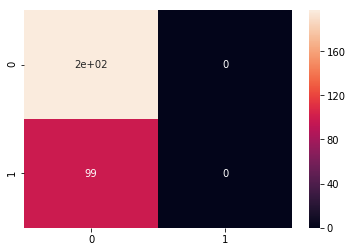

In [59]:
import tensorflow as tf
pred=network.predict(X_test)
lab = [np.argmax(i) for i in pred]
cm =tf.math.confusion_matrix(y_test,lab)
sns.heatmap(cm,annot=True)

Comparing the three models that is the  RandomForest,Neural network and Support Vector Machine,the scores generated after the underfitting was implement on the models. RandomForestClassifier predicted better than the other models as shown in the various classification report.
The heat map in the RandomForest Classifier showed that we had $TN=1.9e+02$ and $TP=91$.Those that were not predicted accurately is only $8$ .
For the Support Vector Machine,the $TP=0,TN=2e+02$ and those that were not predicted accuraly is $99$.So we can clearly see that the 'svm' did not give us a very good prediction.
Also,the neural network's $TP=0,T=2e+02$ and those not predicted accurately is $99$ which is similar to the support vector machine.
From the pictorial plot and the scores we can conclude that the RandomForest Classifier works better and so when any new input is made it will predict accurately

In [60]:
np.random.seed(7)
from tensorflow.keras.layers import Dense
from tensorflow import keras
def build_classifier(optimizer):
    classifier =keras.Sequential()
    classifier.add(Dense(1180, activation='relu'))
    classifier.add(Dense(1180, activation='relu'))
    classifier.add(Dense(1, activation='sigmoid'))
    classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics =['accuracy'])
    return classifier

In [61]:
from keras.wrappers.scikit_learn import KerasClassifier
classifier = KerasClassifier(build_fn=build_classifier)
classifier

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
parameters ={'batch_size':[1000,3000],
            'nb_epoch':[10,20,50],
            'optimizer':['Adam','rmsprop','SGD']}
random_search= RandomizedSearchCV(estimator=classifier, param_distributions=parameters,n_iter=10,cv=KFold(5),random_state=0)

In [63]:
random_search.fit(X_train,y_train)
# help(RandomizedSearchCV)

1/1 [==============================] - 1s 1s/step - loss: 892.6263 - accuracy: 0.6706


1/1 [==============================] - 1s 987ms/step - loss: 618.5710 - accuracy: 0.6706


1/1 [==============================] - 1s 898ms/step - loss: 44.3404 - accuracy: 0.3294


1/1 [==============================] - 1s 1s/step - loss: 132.1007 - accuracy: 0.3284


1/1 [==============================] - 1s 975ms/step - loss: 970.2627 - accuracy: 0.6716


1/1 [==============================] - 1s 1s/step - loss: 154.6954 - accuracy: 0.6706


1/1 [==============================] - 1s 952ms/step - loss: 1765.8501 - accuracy: 0.3294


1/1 [==============================] - 1s 985ms/step - loss: 520.6887 - accuracy: 0.6706


1/1 [==============================] - 1s 1s/step - loss: 2542.5054 - accuracy: 0.3294


1/1 [==============================] - 1s 1s/step - loss: 567.7180 - accuracy: 0.6669


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001A910C8DB00>,
                   param_distributions={'batch_size': [1000, 3000],
                                        'nb_epoch': [10, 20, 50],
                                        'optimizer': ['Adam', 'rmsprop',
                                                      'SGD']},
                   random_state=0)

In [28]:
random_search.best_score_

0.5923728764057159

We used the RandomSearch in choosing the best parameters in getting the best score but still the neural network did not give us encouraging results.We also made use of the KFold in getting the required divisions of our choice.And since is a RandomSearch we took into consieration the inbuilt algorithm in keras called KerasClassifier.The optimizers considered are 'rmsprop','Adam'and 'SGD'.Also batch size (1000,3000) and epoochs (10,20,50)

# Testing other techniques

From the data frame we can see that the values were already scaled except for 'Amount' and 'Time' and so we scale them and test our model

In [64]:
mean=np.mean(df.Amount)
mean1=np.mean(df.Time)
r=df.Amount
t=df.Time
df['Amount']=(r-mean)/np.std(df.Amount)
df['Time']=(t-mean1)/np.std(df.Time)

In [66]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [67]:
from sklearn.model_selection import train_test_split
x1=df.drop(['Class'],axis=1)
y1=df.Class
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [69]:
RF2=RandomForestClassifier()
RF2.fit(x_train,y_train)
RF2.score(x_test,y_test)

0.9995259997893332

In [70]:
svm1=SVC()
svm1.fit(x_train,y_train)

SVC()

In [71]:
svm1.score(x_test,y_test)

0.9993504441557529